# The Great Emu Fight

[TODO: write index & label sections with numbers]

## Preamble

Welcome one, welcome all, to the biggest fight of the gigayear: The Great Emu Fight!

No, we don't mean this [emu fight](https://en.wikipedia.org/wiki/Emu_War):

In [1]:
from IPython.display import Image
Image('images/emu_war.png', width=400)

Nor do we mean this one:

In [2]:
from IPython.display import HTML
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/d9OBqYbZ99c" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

We're talking about *emulators*, or "emus" for short. Like the giant Australian birds, these emus are powerful and fast. Unlike the birds, our emus are regression models that are important for astrophysics, and they're a lot less fluffy.

In this tutorial, we'll teach you what an emulator is, and show you how to build emulators with various methods and frameworks. We will then pit our emus against each other and see which emu wins!

## What is an emulator?

Emulators imitate more complex models or simulations; they take input parameters and quickly spit out output values, without performing a physical calculation or a full simulation.

To do this, we train them on the inputs and outputs of simulations. They then learn this relationship, and for any new set of inputs, they can give an ouput. They are essentially fancy interpolators.

Let's take a simple example. Say a computational emu biologist wants to know how fast a particular emu can run. The biologist knows the emu's height, age, and fluffiness. They build a super intense simulator that takes in these demographics, and outputs the expected top speed of the bird.

The issue is that the biologist's simulator is so complicated that it takes an hour to run for each set of input parameters. This is where emulators come in. The biologist just runs a small number of simulations, sparsely spanning a reasonable range of parameter space (heights, ages, fluffiness levels). Then we train an emulator on this set of data. Now, for any other emu demographics, the emulator can quickly predict a given emu's top speed.

Why do we want an emulator of our simulation? They come in really handy for *inference*. Let's say we see an emu running at top speed down the street, breaking the city speed limit (yes, some can run this fast). But it got away, so to ID it we want to figure out its height, age, and fluffiness. If we only had the biologist's simulator, we would have to run a simulation at every possible demographic combination, and see which top speed most closely matched that of our runaway emu.

This would be untenable with the hour-long simulator. With our emulator, we can explore this parameter space much more quickly, and use techniques such as Markov Chain Monte Carlo to infer the distribution of likely bird characteristics.

## Emulation in Astrophysics

Alas, we are not computational emu biologists but astrophysicists. But it turns out emulators are super handy for us too! Some areas emulators have been used:
* Emulating galaxy clustering statistics for cosmological parameter inference
* Emulating stellar population synthesis models
* Emulating supernovae lightcurves

Here we will demonstrate our emulators on the first use case. A common problem in cosmology is inferring the cosmological parameters that govern our universe - such as the overall density of matter and baryons. We can do this by running giant simulations of fake universes where we know the input cosmological parameters. We can then measure galaxy clustering statistics (e.g. a power spectrum) on both the real and fake universes, and compare them. However, we have the same problem here as we did with the emu speed simulator: it's very slow so we can't run a simulation and get statistics at all possible parameter sets.

We can instead run a small set of simulations spanning cosmological parameter space, and compute clustering statistics on these. Then we can train an emulator on these input parameters and output statistics, and use it to find a set of cosmological parameters that generates statistics most like those we measure in our real universe.

## Our Dataset: The 2-Point Correlation Function

We generated a set of clustering statistics to demonstrate our emulators on. Instead of running full-blown cosmological simulations, which would take much longer than the span of this Hack Week, we used the `nbodykit` package. This can compute a model of a clustering statistic for a given cosmology in about a second - which is actually quite slow for robust inference, so our emulator is still useful! 

We choose to emulate the 2-point correlation function, the Fourier transform of the power spectrum, which measures the strength of galaxy clustering at a given spatial scale.

We vary the cosmological parameters $\Omega_m$ (the matter density), $\sigma_8$ (the amplitude of clustering), and $\Omega_b$ (the baryon density), fixing the other parameters to reasonable values. We generate a training set of 8000 correlation functions, on a uniform 3D grid of these parameters (20 points per side). We also generate a test set of 100 correlation functions, to see how our emulator did.

We need some specific packages so if they don't exist already, they will be downloaded.

In [3]:
try:
    import tensorflow
except ModuleNotFoundError:
    !pip install tensorflow

We plot our training set:

In [4]:
import emulator
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

In [5]:
emu = emulator.emulator()
path_train = 'data/cosmology_train.pickle'
path_test = 'data/cosmology_test.pickle'
emu.read_data(path_train, path_test, scale=True, normalize_y=True)

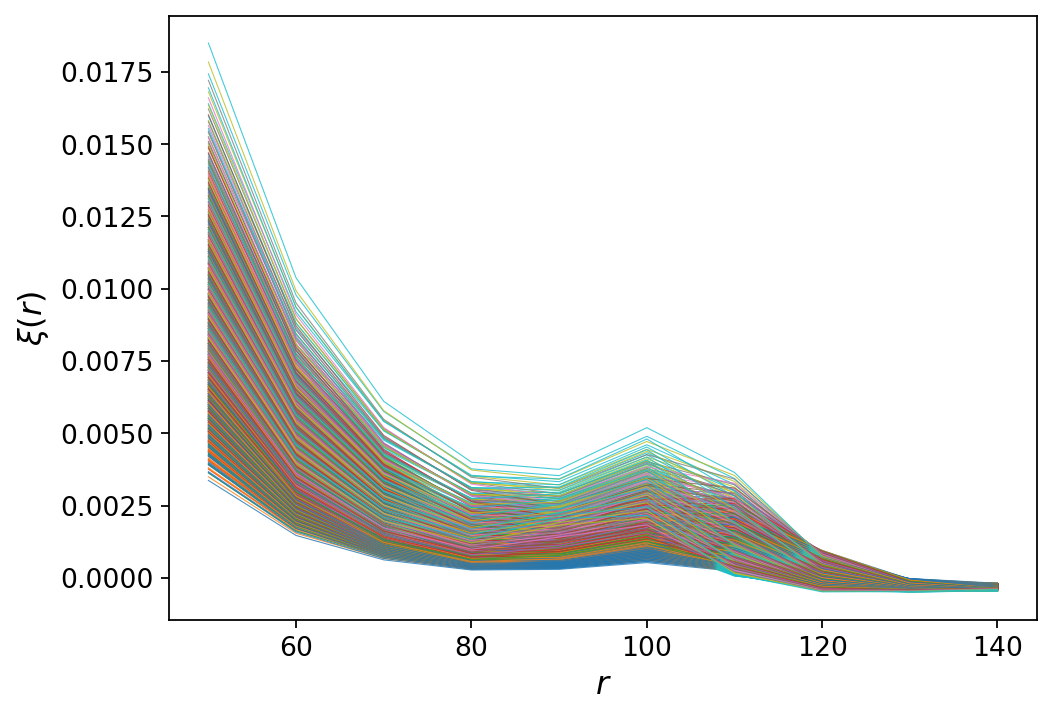

In [6]:
emu.plot_training()

The pattern is because these are in order along the grid, so parameter sets near each other have similar shapes and are plotted in that order with corresponding colors.

## The Emulator Lineup

We pit a few common emulator methods against each other: an Artifical Neural Network, a Decision Tree, a Random Forest, and multiple Gaussian Process frameworks.

For standalone notebooks constructing each of these emulators, see the linked jupyter notebooks.
[TODO: link to jupyter notebooks!]

We compare each on accuracy and speed. It would also be interesting to compare scaleability; we leave this as an exercise to the reader.

### Artificial Neural Network Emulator

[TODO: emulator description]

[TODO: time training and testing]

In [7]:
emu.train("ANN")

In [8]:
emu.predict_test_set("ANN")

In [9]:
emu.test("ANN", "r2")
print(emu.models["ANN"]["r2"])
emu.test("ANN", "mse")
print(emu.models["ANN"]["mse"])

[0.9997877  0.99976599 0.99995193 0.99980148 0.99941412 0.99965267
 0.99983479 0.99981296 0.99900744 0.99945046]
[1.67774914e-09 6.33812647e-10 4.88639840e-11 9.08508991e-11
 2.28532375e-10 2.52924862e-10 8.03440522e-11 1.53131084e-11
 7.80284108e-12 2.34800369e-12]


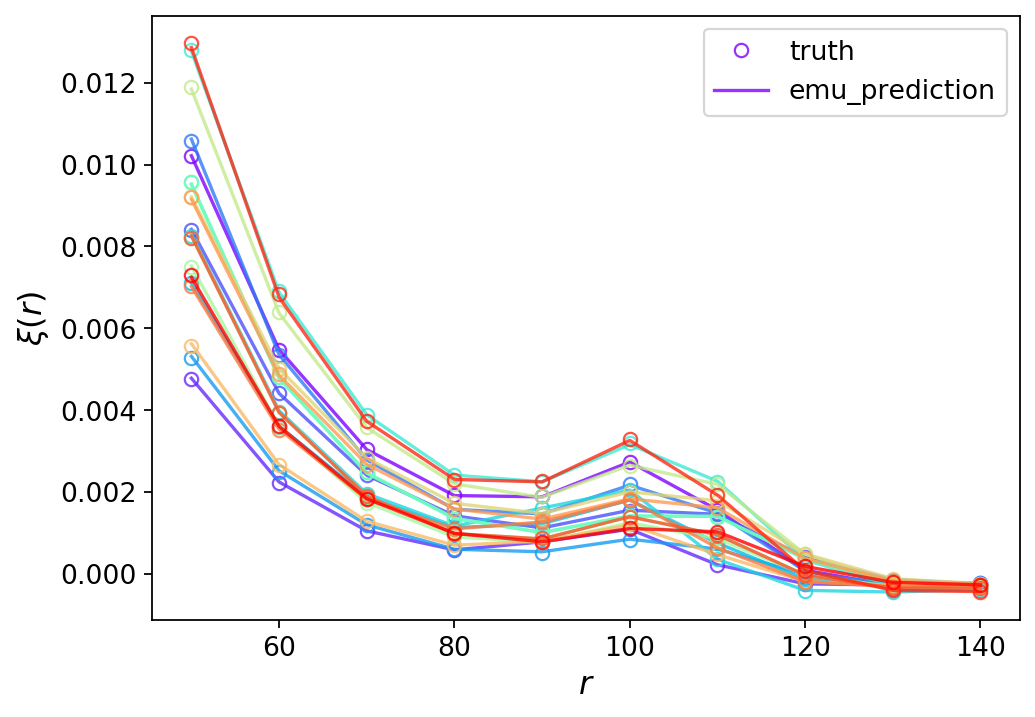

In [10]:
emu.plot_predictions("ANN")

### Decision Tree Emulator

[TODO: emulator description]

[TODO: load, train, and test emulator]

### Random Forest Emulator

[TODO: emulator description]

[TODO: time training and testing]

In [11]:
emu.train("RF")

In [12]:
emu.predict_test_set("RF")

In [13]:
emu.test("RF", "r2")
print(emu.models["RF"]["r2"])
emu.test("RF", "mse")
print(emu.models["RF"]["mse"])

[0.98822913 0.98783239 0.98793604 0.98659835 0.98714257 0.98934596
 0.98610943 0.98078535 0.98104612 0.98710504]
[9.30233717e-08 3.29558839e-08 1.22626401e-08 6.13327751e-09
 5.01525907e-09 7.75835624e-09 6.75538762e-09 1.57311556e-09
 1.49002195e-10 5.50960866e-11]


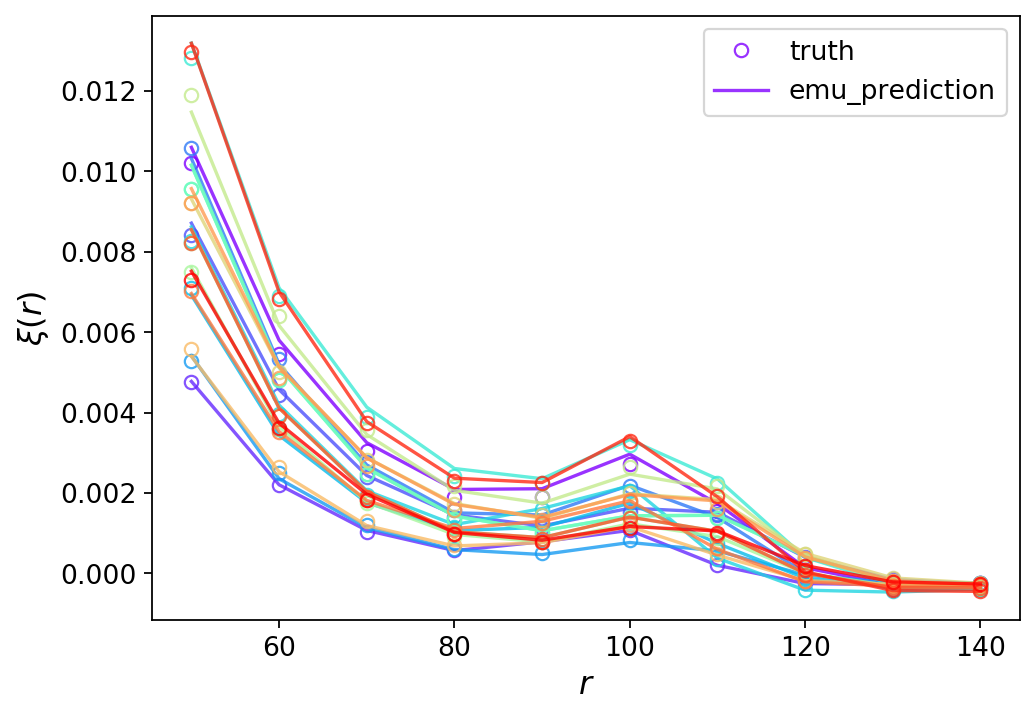

In [14]:
emu.plot_predictions("RF")

### Gaussian Process Emulators (celerite, george, GPy)

[TODO: emulator description]

[TODO: load, train, and test emulator]

[TODO: time training and testing]

## Ready, Set, Fight

### Accuracy comparison

We can now compare the accuracy of the emulators! We use the validation statistics we measured for each, and plot them against each other, as a function of the bins.

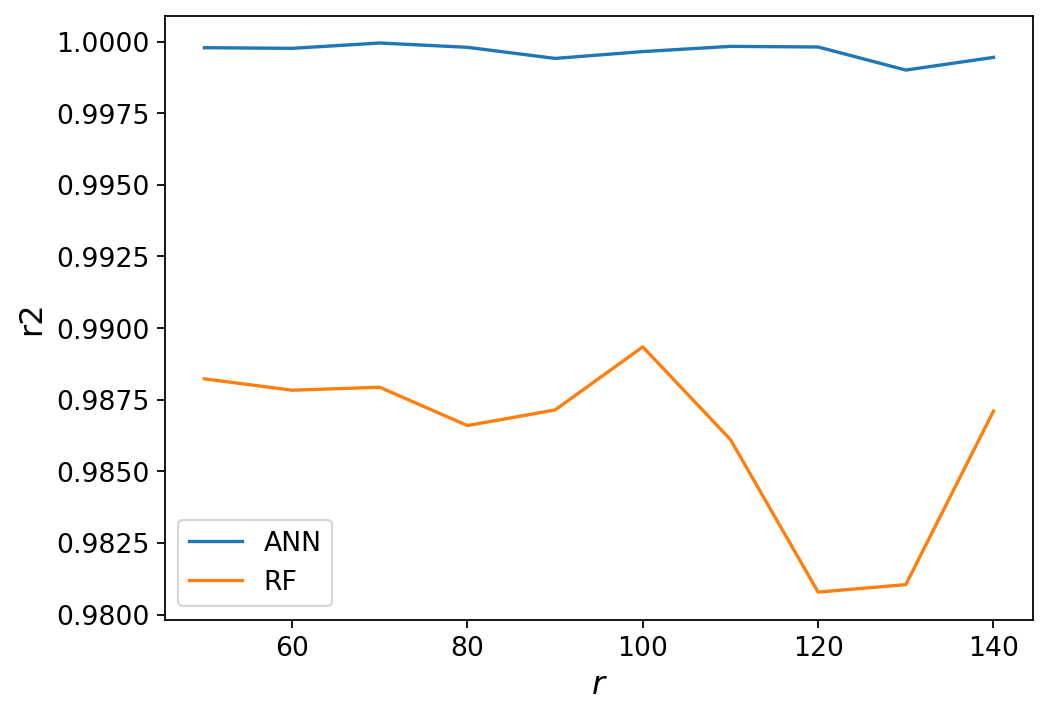

In [15]:
metric = "r2"
emu.plot_accuracy(metric)

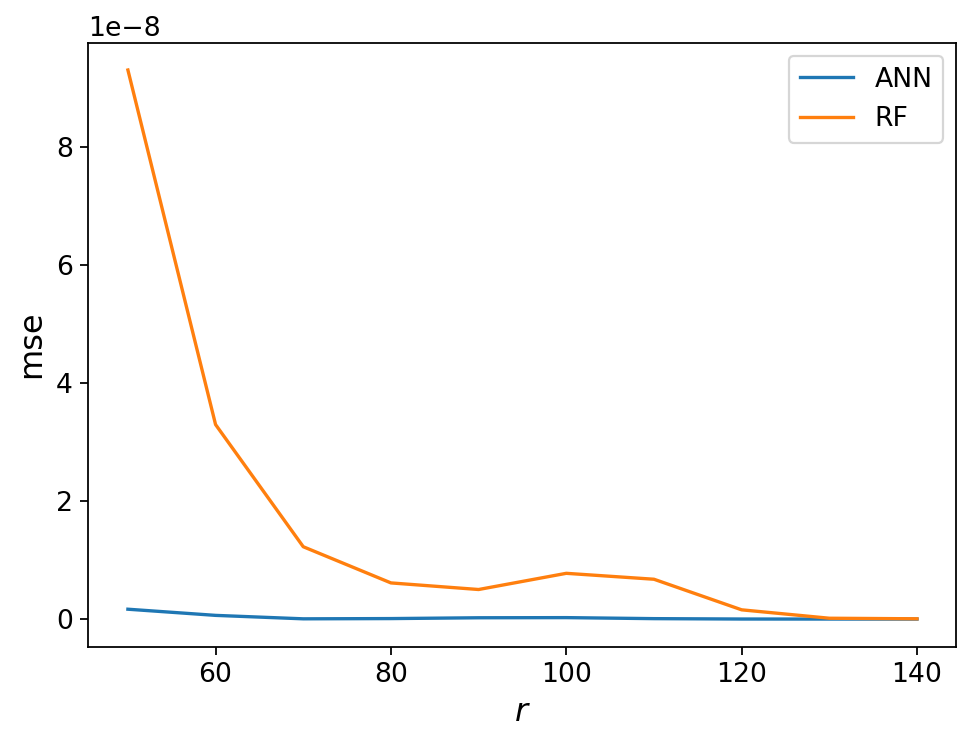

In [16]:
metric = "mse"
emu.plot_accuracy(metric)

We can see that for both of these accuracy metrics on this dataset, the ANN is winning! 

However, we caution that while we have done our best to tune the hyperparameters, there may be better sets of hyperparameters that improve each model. The performance will also compare differently on different datasets.

### Speed comparison

[TODO: plot speeds of each emulator]

### And the winner is...

[TODO: discuss which was best in each category, but explain that use cases & tuning differ and all emulators are good emulators]